<a href="https://colab.research.google.com/github/Thiago89ml/Trabajo-Inteligencia-Artificial-Letalidad-de-Tumor-/blob/main/Copia_de_Clasificaci%C3%B3n_C%C3%A1ncer_de_mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aprendizaje supervisado - Clasificación con K-NN

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
x =df[["radius_mean","texture_mean","perimeter_mean"]]

y= df['diagnosis'].replace({'B': 0, 'M': 1})

scaler = StandardScaler()

XScaled = scaler.fit_transform(x)

kn = KNeighborsClassifier(n_neighbors= 3)

kn.fit(XScaled,y)

/tmp/ipython-input-1427856680.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y= df['diagnosis'].replace({'B': 0, 'M': 1})


KNeighborsClassifier(n_neighbors=3)

<function matplotlib.pyplot.show(close=None, block=None)>

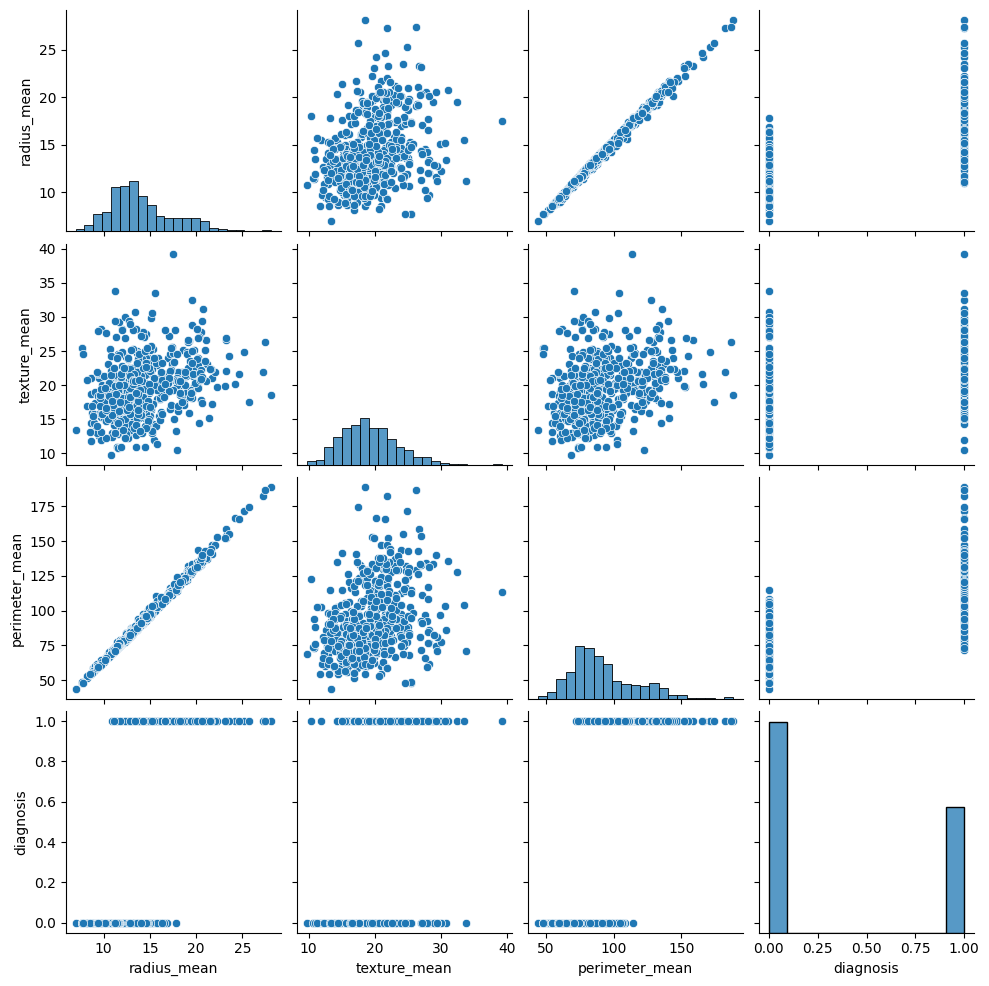

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df['diagnosis'].replace({'B': 0, 'M': 1}, inplace=True)

cols= df[["radius_mean","texture_mean","perimeter_mean","diagnosis"]]
sns.pairplot(cols)
plt.show

<Axes: >

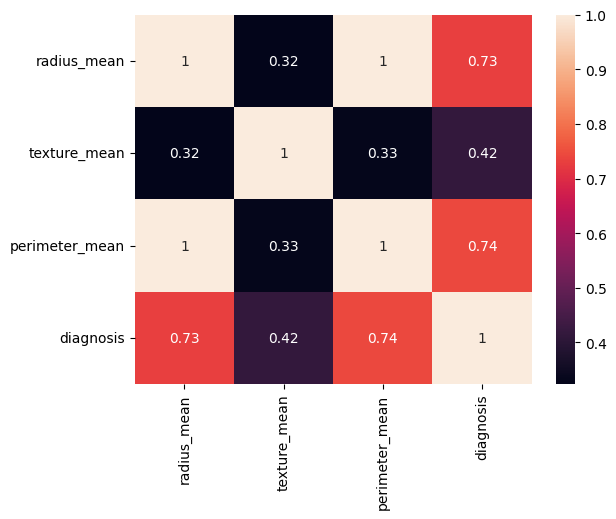

In [ ]:
sns.heatmap(cols.corr(), annot = True)

In [ ]:
#radius mean / tecture mean / perimeter mean
input =[[14.22,40.0,43.73]]
inputScaler = scaler.transform(input)
output = kn.predict(inputScaler)

print ("El tumor es : ", output[0])

El tumor es :  0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


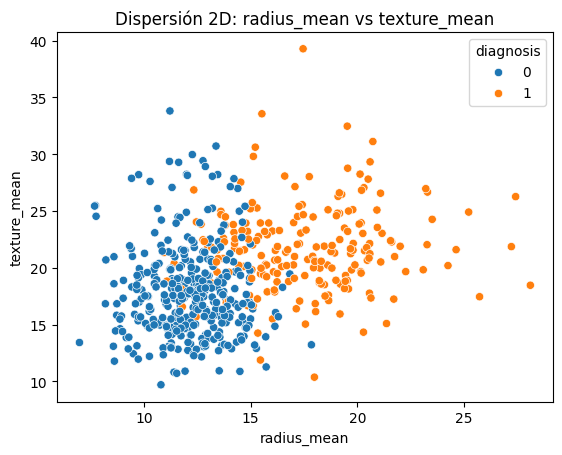

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb


plt.figure()
sb.scatterplot(
  data=df,
  x="radius_mean",
  y="texture_mean",
  hue="diagnosis"
)
plt.title("Dispersión 2D: radius_mean vs texture_mean")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend(title="diagnosis")
plt.show()

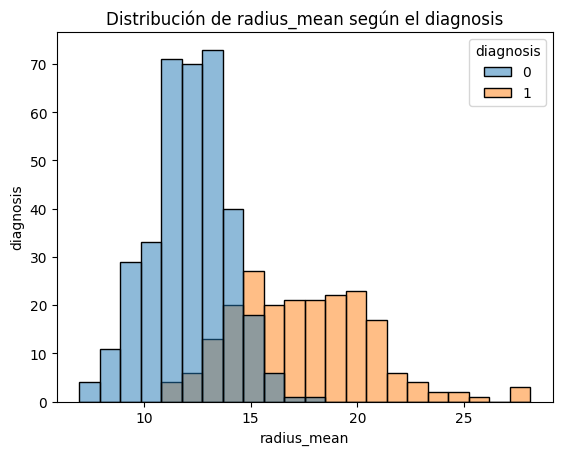

In [ ]:
plt.figure()
sb.histplot(
  data=df,
  x="radius_mean",
  hue="diagnosis"
 )
plt.title("Distribución de radius_mean según el diagnosis")
plt.xlabel("radius_mean")
plt.ylabel("diagnosis")
plt.show()

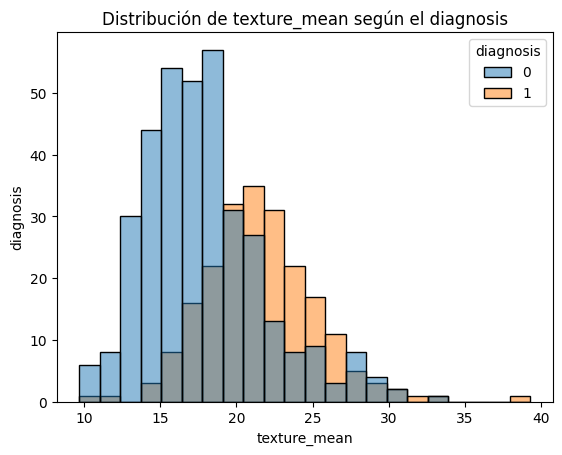

In [ ]:
plt.figure()
sb.histplot(
  data=df,
  x="texture_mean",
  hue="diagnosis"
 )
plt.title("Distribución de texture_mean según el diagnosis")
plt.xlabel("texture_mean")
plt.ylabel("diagnosis")
plt.show()

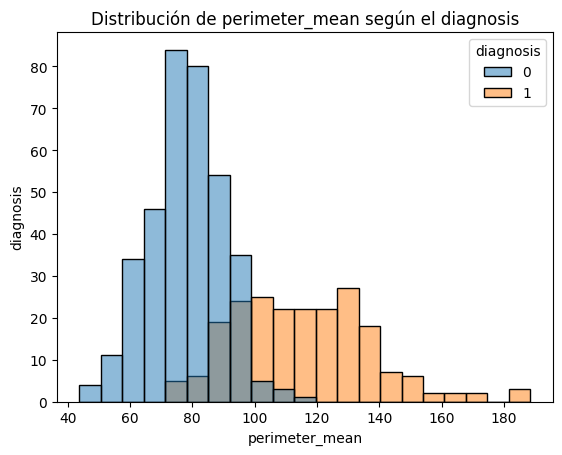

In [ ]:
plt.figure()
sb.histplot(
  data=df,
  x="perimeter_mean",
  hue="diagnosis"
 )
plt.title("Distribución de perimeter_mean según el diagnosis")
plt.xlabel("perimeter_mean")
plt.ylabel("diagnosis")
plt.show()

### Dataset

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Información adicional.
`df['diagnosis'].replace({'B': 0, 'M': 1})`